# Tuberculosis - Brazil

# Lesson 01 - Time Series

---

# Lesson 01 - part 01 - What are time series?

## 1. Importing Libraries

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dateparser
import numpy as np

## 2. Getting the data

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv'

tuberculosis = pd.read_csv(url, encoding='ISO-8859-1',
                           sep=';', skiprows=3,
                           skipfooter=16, engine='python')

tuberculosis.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [3]:
tuberculosis.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672,86207
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020,90291
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900,94354
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220,96005
19,Total,142969,129386,149875,143199,143264,133444,141800,149952,140241,144870,136864,128893,1684757


### Challenge 01: Convert the dataset into 'time series format' - year/month

In [4]:
tuberculosis.drop('Total', axis=1, inplace=True)
tuberculosis.drop(19, axis=0, inplace=True)

tuberculosis.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
14,2015,7111,6160,7833,6880,6893,6916,7531,7463,7189,7345,7287,6844
15,2016,7116,6800,8067,7360,7315,7527,6991,7702,7030,6588,7039,6672
16,2017,7481,6803,8680,6780,8091,7394,7225,8110,7447,7809,7451,7020
17,2018,7881,6821,7901,8121,7892,7720,8109,8934,7663,8701,7711,6900
18,2019,8392,7754,7648,8274,8383,7363,8382,8239,8143,8592,7615,7220


In [5]:
tuberculosis_melted = \
    (tuberculosis.melt(id_vars=['Ano Diagnóstico'], 
                       value_vars=['Jan', 'Fev', 'Mar', 
                                   'Abr', 'Mai', 'Jun', 
                                   'Jul', 'Ago', 'Set', 
                                   'Out', 'Nov', 'Dez'],
                       var_name='month_pt',
                       value_name='qty')
                 .rename(columns={'Ano Diagnóstico' : 'year'}))

tuberculosis_melted.tail()

,year,month_pt,qty
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900
227,2019,Dez,7220


In [6]:
# my solution
def pt_month_str_to_datetime_object(month: str):
    return dateparser.parse(month, languages=['pt']).month

tuberculosis_melted['month'] = \
    tuberculosis_melted['month_pt'].map(pt_month_str_to_datetime_object)

tuberculosis_melted.head()


tuberculosis_melted['diagnosis_date'] = \
    pd.to_datetime(tuberculosis_melted[['year', 'month']].assign(Day=1))

tuberculosis_melted.head()

,year,month_pt,qty,month,diagnosis_date
0,2001,Jan,8088,1,2001-01-01
1,2002,Jan,8013,1,2002-01-01
2,2003,Jan,8115,1,2003-01-01
3,2004,Jan,7574,1,2004-01-01
4,2005,Jan,7432,1,2005-01-01


# Lesson 1 - part 02 - preparing the data

In [7]:
# another solution
tuberculosis_melted['diagnosis_date_2'] = \
    tuberculosis_melted['year']+'-'+tuberculosis_melted['month_pt']

tuberculosis_melted.head()

,year,month_pt,qty,month,diagnosis_date,diagnosis_date_2
0,2001,Jan,8088,1,2001-01-01,2001-Jan
1,2002,Jan,8013,1,2002-01-01,2002-Jan
2,2003,Jan,8115,1,2003-01-01,2003-Jan
3,2004,Jan,7574,1,2004-01-01,2004-Jan
4,2005,Jan,7432,1,2005-01-01,2005-Jan


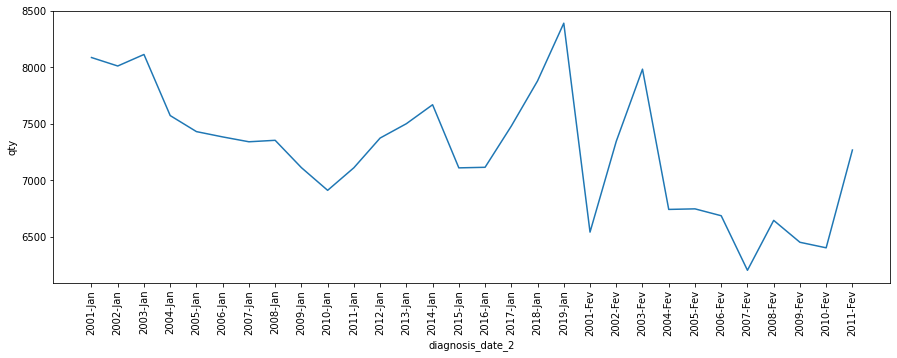

In [8]:
plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_melted[:30],
             x='diagnosis_date_2',
             y='qty')

plt.xticks(rotation=90);

- the date is not sorted, because it's a string not a date.

In [9]:
tuberculosis_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year              228 non-null    object        
 1   month_pt          228 non-null    object        
 2   qty               228 non-null    int64         
 3   month             228 non-null    int64         
 4   diagnosis_date    228 non-null    datetime64[ns]
 5   diagnosis_date_2  228 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 10.8+ KB


- my solution solve this problem because I created a datetime column.

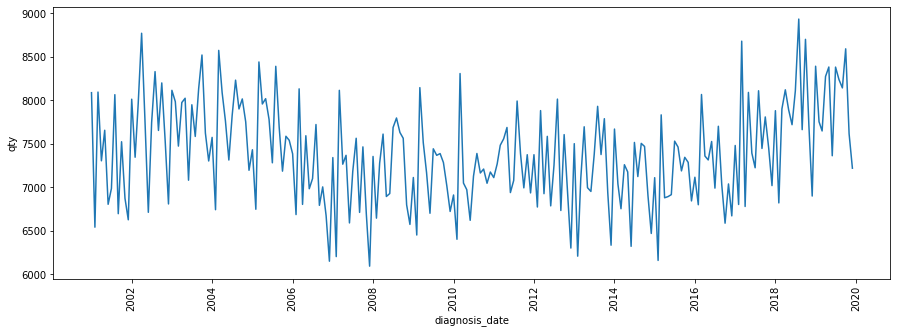

In [10]:
plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_melted,
             x='diagnosis_date',
             y='qty')

plt.xticks(rotation=90);

### Challenge 02: Convert the diagnosis_date_2 into datetime format.

My Challenge 01 solution already solve this problem. However, to practice, let's convert the column into datetime format.

In [11]:
def pt_date_str_to_datetime_object(year_month: str):
    return dateparser.parse(year_month+'/1', languages=['pt'])

tuberculosis_melted['diagnosis_date_3'] = \
    tuberculosis_melted['diagnosis_date_2'].map(pt_date_str_to_datetime_object)

tuberculosis_melted.head()

,year,month_pt,qty,month,diagnosis_date,diagnosis_date_2,diagnosis_date_3
0,2001,Jan,8088,1,2001-01-01,2001-Jan,2001-01-01
1,2002,Jan,8013,1,2002-01-01,2002-Jan,2002-01-01
2,2003,Jan,8115,1,2003-01-01,2003-Jan,2003-01-01
3,2004,Jan,7574,1,2004-01-01,2004-Jan,2004-01-01
4,2005,Jan,7432,1,2005-01-01,2005-Jan,2005-01-01


In [12]:
tuberculosis_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year              228 non-null    object        
 1   month_pt          228 non-null    object        
 2   qty               228 non-null    int64         
 3   month             228 non-null    int64         
 4   diagnosis_date    228 non-null    datetime64[ns]
 5   diagnosis_date_2  228 non-null    object        
 6   diagnosis_date_3  228 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 12.6+ KB


# Lesson 02 - Manipulating Data - datetime format

How the teachers solved the problem of convert the month from Portuguese to English.

I already did it through `dateparser.parse`.

In [13]:
month_pt_en = {
    'Jan': 'Jan',
    'Fev': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'Mai': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Out': 'Oct',
    'Nov': 'Nov',
    'Dez': 'Dec'
}


tuberculosis_melted['month_pt'].map(month_pt_en)

# create a column with the month in English
# join the strings year and month in English
# use pd.to_datetime() in the column with the strings added

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
223    Dec
224    Dec
225    Dec
226    Dec
227    Dec
Name: month_pt, Length: 228, dtype: object

In [14]:
# solution from discord

# !locale-gen "pt_BR.UTF-8"

# import locale
# locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# pd.to_datetime(tuberculosis_melted['diagnosis_date_2'], format='%Y-%b')

In [15]:
tuberculosis_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year              228 non-null    object        
 1   month_pt          228 non-null    object        
 2   qty               228 non-null    int64         
 3   month             228 non-null    int64         
 4   diagnosis_date    228 non-null    datetime64[ns]
 5   diagnosis_date_2  228 non-null    object        
 6   diagnosis_date_3  228 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 12.6+ KB


In [42]:
tuberculosis_ts = tuberculosis_melted[['diagnosis_date', 'qty']].copy()

tuberculosis_ts.head()

,diagnosis_date,qty
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432


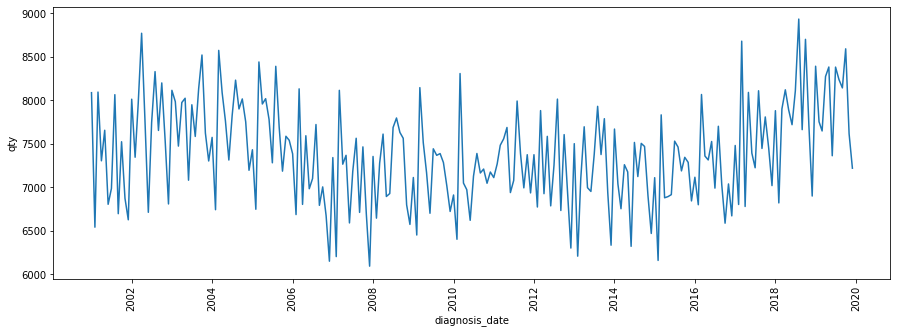

In [17]:
plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='qty')

plt.xticks(rotation=90);

### Challenge 01: Reproduce the code above (convert str to datetime) with another dataset - leprosy.

- Getting the data

In [18]:
url_leprosy = 'https://raw.githubusercontent.com/gabrielatrindade/alura-bootcamp/master/module4/data/A123202189_28_143_208.csv'

leprosy = pd.read_csv(url_leprosy, encoding='ISO-8859-1',
                      sep=';', skiprows=3,
                      skipfooter=10, engine='python',
                      na_values='-')

leprosy.drop('Total', axis=1, inplace=True)
leprosy.drop(46, inplace=True)
leprosy.drop(0, inplace=True)
leprosy.reset_index(drop=True, inplace=True)


leprosy.tail()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
40,2015,2729.0,2969.0,3476.0,2930.0,3017.0,2969.0,3018.0,3244.0,3241.0,3075.0,2819.0,2412.0
41,2016,2393.0,2540.0,3000.0,2702.0,2616.0,2957.0,2603.0,3113.0,2881.0,2644.0,2528.0,2213.0
42,2017,2585.0,2718.0,3162.0,2557.0,3243.0,2806.0,2739.0,3288.0,2856.0,3275.0,2961.0,2448.0
43,2018,2971.0,2877.0,3276.0,3157.0,3237.0,2913.0,2976.0,3644.0,3274.0,3423.0,2909.0,2268.0
44,2019,3105.0,3319.0,2804.0,3037.0,3047.0,2567.0,2856.0,3107.0,3060.0,3137.0,2715.0,1886.0


- Manipulating it

In [19]:
leprosy_melted = (leprosy.melt(id_vars='Ano Diagnóstico',
                              value_name='cases',
                              var_name='month_pt')
                         .rename(columns={'Ano Diagnóstico' : 'year'}))

leprosy_melted.reset_index(drop=True, inplace=True)

leprosy_melted

,year,month_pt,cases
0,1975,Jan,NaN
1,1976,Jan,NaN
2,1977,Jan,2.0
3,1978,Jan,NaN
4,1979,Jan,2.0
...,...,...,...
535,2015,Dez,2412.0
536,2016,Dez,2213.0
537,2017,Dez,2448.0
538,2018,Dez,2268.0


- Creating datetime column

In [20]:
leprosy_melted['month'] = leprosy_melted['month_pt'].map(pt_month_str_to_datetime_object)
leprosy_melted['date'] = pd.to_datetime(leprosy_melted[['year', 'month']].assign(Day=1))

leprosy_melted

,year,month_pt,cases,month,date
0,1975,Jan,NaN,1,1975-01-01
1,1976,Jan,NaN,1,1976-01-01
2,1977,Jan,2.0,1,1977-01-01
3,1978,Jan,NaN,1,1978-01-01
4,1979,Jan,2.0,1,1979-01-01
...,...,...,...,...,...
535,2015,Dez,2412.0,12,2015-12-01
536,2016,Dez,2213.0,12,2016-12-01
537,2017,Dez,2448.0,12,2017-12-01
538,2018,Dez,2268.0,12,2018-12-01


- Selecting the columns, sorting the values

In [21]:
leprosy_ts = leprosy_melted[['date', 'cases']] \
                  .copy() \
                  .sort_values('date', ascending=True) \
                  .reset_index(drop=True) \
        
        
        
leprosy_ts.head()

,date,cases
0,1975-01-01,NaN
1,1975-02-01,1.0
2,1975-03-01,NaN
3,1975-04-01,NaN
4,1975-05-01,NaN


- Fill null values

In [22]:
leprosy_ts['cases'].fillna(method='backfill', inplace=True)
leprosy_ts

,date,cases
0,1975-01-01,1.0
1,1975-02-01,1.0
2,1975-03-01,1.0
3,1975-04-01,1.0
4,1975-05-01,1.0
...,...,...
535,2019-08-01,3107.0
536,2019-09-01,3060.0
537,2019-10-01,3137.0
538,2019-11-01,2715.0


### Challenge 02: Improve the line plot.

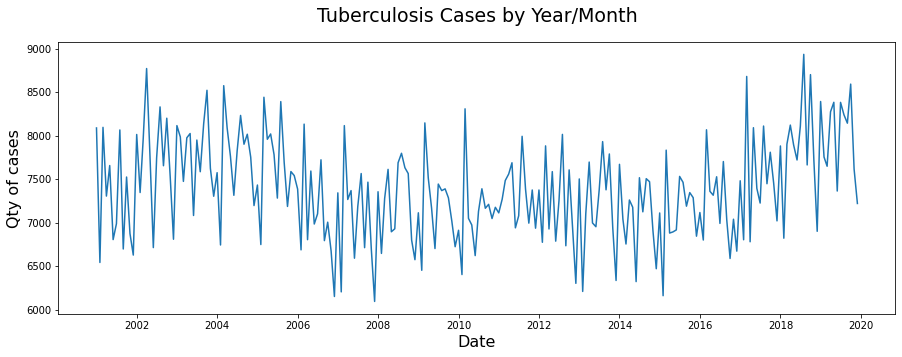

In [23]:
plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='qty')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Qty of cases', fontsize=16)
plt.title('Tuberculosis Cases by Year/Month', fontsize=19, pad=20);

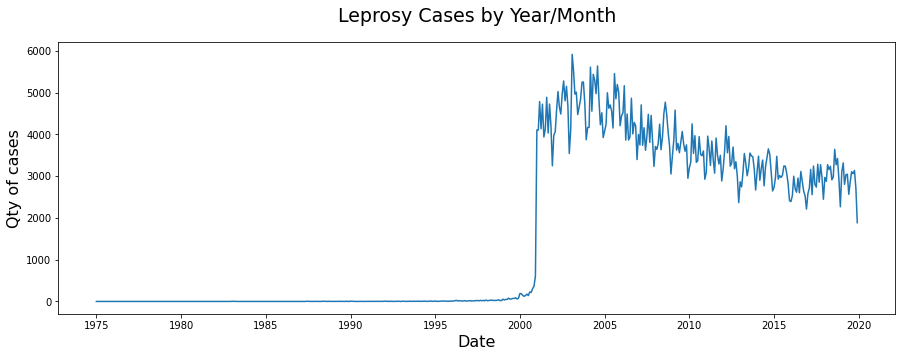

In [24]:
plt.figure(figsize=(15,5))

sns.lineplot(data=leprosy_ts,
             x='date',
             y='cases')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Qty of cases', fontsize=16)
plt.title('Leprosy Cases by Year/Month', fontsize=19, pad=20);

# Lesson 3 - Starting time series analysis -  Trends and moving average

**Challenge 01: Search about frequency spectrum**

- to analyse the curve trends, we calculate the moving average

In [25]:
# calculate 'qty' every 3 months
tuberculosis_ts['qty'].rolling(3)

Rolling [window=3,center=False,axis=0]

In [27]:
# sum qty every 3 months
tuberculosis_ts['qty'].rolling(3).sum()

0          NaN
1          NaN
2      24216.0
3      23702.0
4      23121.0
        ...   
223    19649.0
224    19986.0
225    20536.0
226    20592.0
227    21140.0
Name: qty, Length: 228, dtype: float64

In [43]:
tuberculosis_ts['moving_average_3'] = \
    tuberculosis_ts['qty'].rolling(3).mean()
    
tuberculosis_ts['moving_average_3']

0              NaN
1              NaN
2      8072.000000
3      7900.666667
4      7707.000000
          ...     
223    6549.666667
224    6662.000000
225    6845.333333
226    6864.000000
227    7046.666667
Name: moving_average_3, Length: 228, dtype: float64

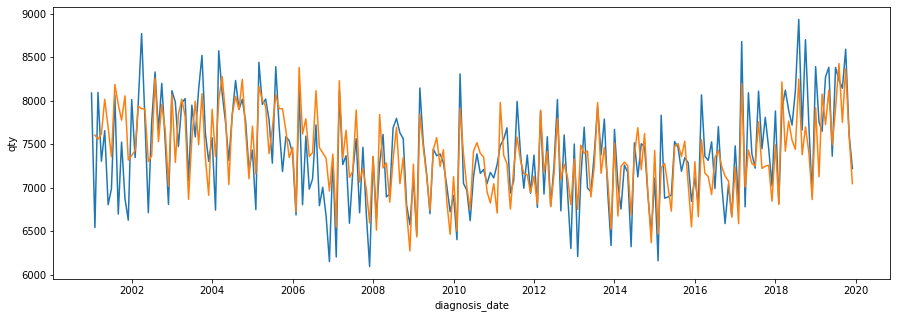

In [44]:
plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='qty')

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='moving_average_3');

It's not possible analyse trends through the graph above

Let's try the same with a different rolling

In [45]:
tuberculosis_ts['moving_average_6'] = \
    tuberculosis_ts['qty'].rolling(6).mean()

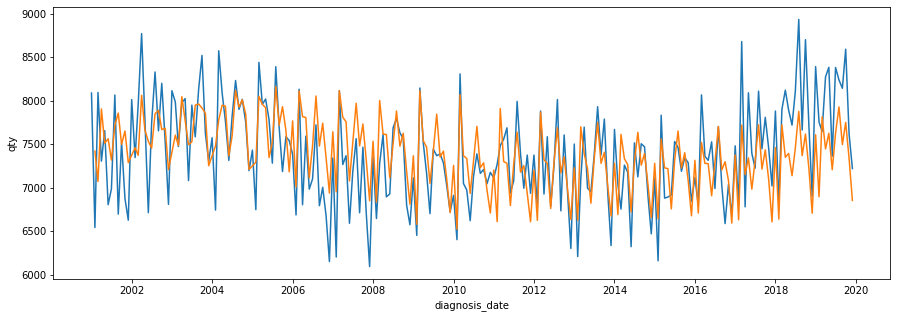

In [46]:
plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='qty')

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='moving_average_6');

### NOTE: Why does it not work well even with  rolling=6?
Because our dataset is not sorted by date, and the 'rolling' will consider the average by the index.

### Let's correct it. Recalculate the moving average. And plot again.

In [47]:
tuberculosis_ts.head()

,diagnosis_date,qty,moving_average_3,moving_average_6
0,2001-01-01,8088,NaN,NaN
1,2002-01-01,8013,NaN,NaN
2,2003-01-01,8115,8072.000000,NaN
3,2004-01-01,7574,7900.666667,NaN
4,2005-01-01,7432,7707.000000,NaN


In [50]:
tuberculosis_ts.sort_values('diagnosis_date', inplace=True)
tuberculosis_ts.reset_index(drop=True, inplace=True)
tuberculosis_ts

,diagnosis_date,qty,moving_average_3,moving_average_6
0,2001-01-01,8088,NaN,NaN
1,2001-02-01,6542,7605.000000,7420.500000
2,2001-03-01,8095,7556.666667,7072.166667
3,2001-04-01,7305,7618.000000,7905.666667
4,2001-05-01,7656,8017.000000,7511.833333
...,...,...,...,...
223,2019-08-01,8239,8427.666667,7928.666667
224,2019-09-01,8143,7751.000000,7496.166667
225,2019-10-01,8592,8367.333333,7750.833333
226,2019-11-01,7615,7592.333333,7334.666667


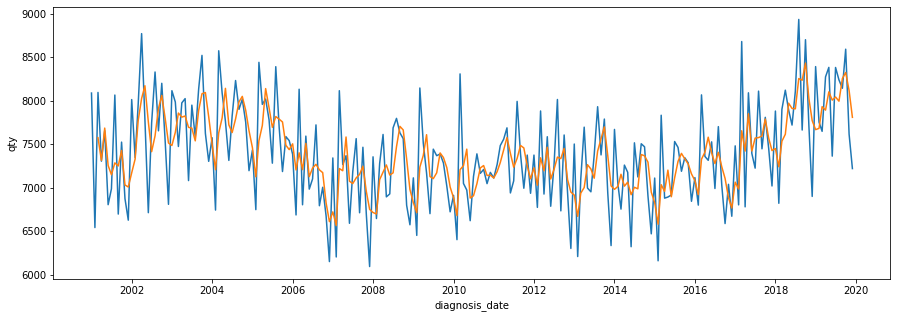

In [53]:
tuberculosis_ts['moving_average_3'] = \
    tuberculosis_ts['qty'].rolling(3).mean()

plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='qty')

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='moving_average_3');

In the graph, some peaks in the moving average line are happening after the cases line

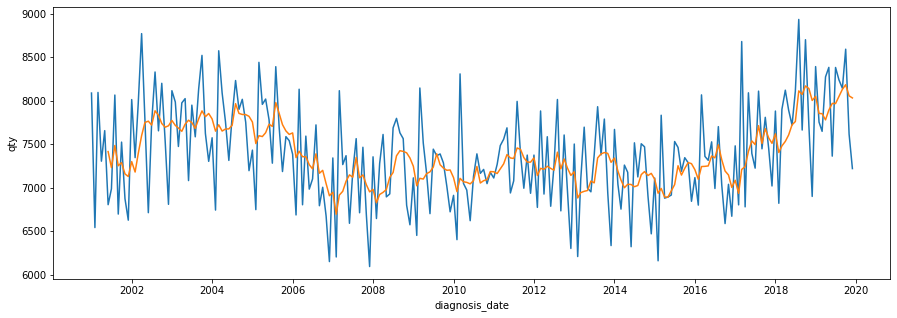

In [52]:
tuberculosis_ts['moving_average_6'] = \
    tuberculosis_ts['qty'].rolling(6).mean()

plt.figure(figsize=(15,5))

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='qty')

sns.lineplot(data=tuberculosis_ts,
             x='diagnosis_date',
             y='moving_average_6');

the moving average smoothes the graph curve

to see the spikes better:

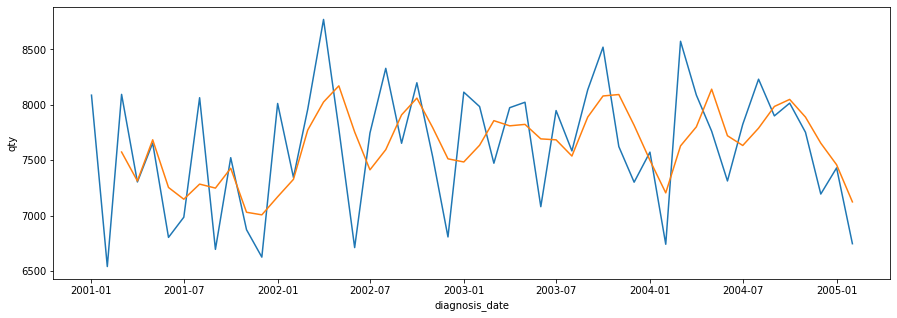

In [56]:
plt.figure(figsize=(15,5))


sns.lineplot(data=tuberculosis_ts[:50],
             x='diagnosis_date',
             y='qty')

sns.lineplot(data=tuberculosis_ts[:50],
             x='diagnosis_date',
             y='moving_average_3');

- Let's try to correct the peaks of moving average according to the peaks of cases.

### centered moving average

In [58]:
tuberculosis_ts['moving_average_3_c'] = \
    tuberculosis_ts['qty'].rolling(3, center=True).mean()

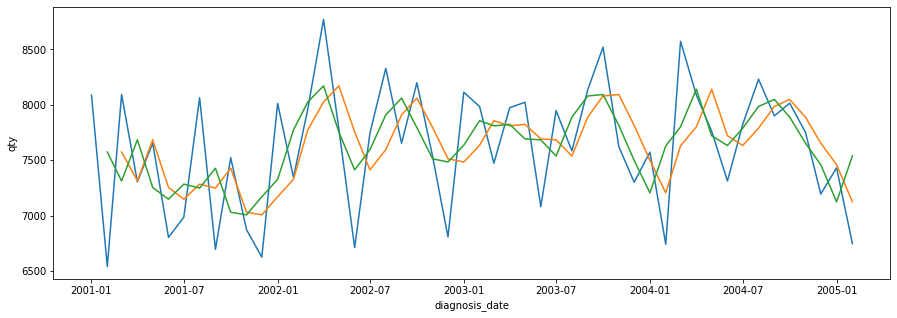

In [60]:
plt.figure(figsize=(15,5))


sns.lineplot(data=tuberculosis_ts[:50],
             x='diagnosis_date',
             y='qty')

sns.lineplot(data=tuberculosis_ts[:50],
             x='diagnosis_date',
             y='moving_average_3');

sns.lineplot(data=tuberculosis_ts[:50],
             x='diagnosis_date',
             y='moving_average_3_c');

**Challenge 02: Analyse the moving average with another period.**

**Challenge 03: Make your first prediction - use the averages (all data, or 3 last months).**

### Challenge 01: Search about frequency spectrum

http://web.stanford.edu/class/earthsys214/notes/series.html#a-simple-example

https://www2.mps.mpg.de/homes/lagg/talks/2004_IMPRS_spectral_analysis/span.pdf

### Challenge 02: Analyse the moving average with another period / window.

In [101]:
def lineplot_tuberculosis_cases_moving_average(rolling: int):
    
    df = tuberculosis_ts[['diagnosis_date', 'qty']].copy()
    df['moving_average_c'] = df['qty'].rolling(rolling, center=True).mean()
    
    plt.figure(figsize=(15,5))

    sns.lineplot(data=df,
                 x='diagnosis_date',
                 y='qty',
                 alpha=0.7,
                 label='cases')

    sns.lineplot(data=df,
                 x='diagnosis_date',
                 y='moving_average_c',
                 linewidth=1.9,
                 label='moving average - rolling '+str(rolling)
                 );

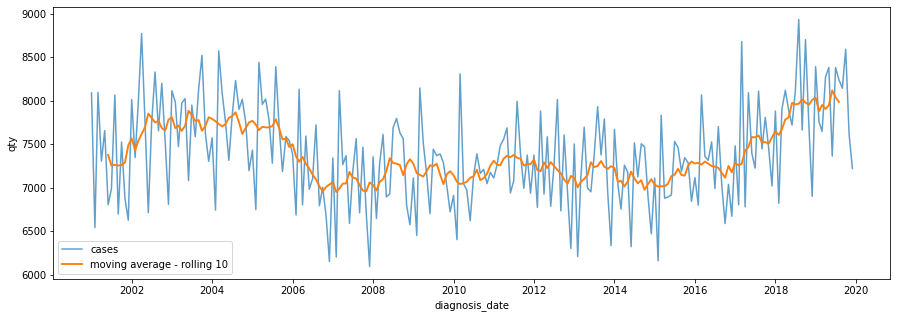

In [102]:
lineplot_tuberculosis_cases_moving_average(10)

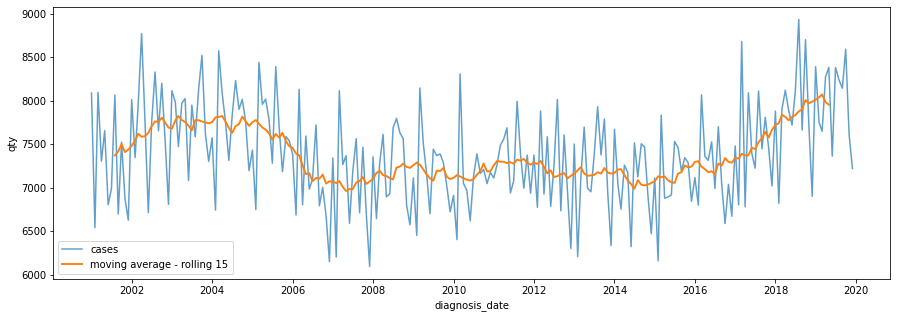

In [103]:
lineplot_tuberculosis_cases_moving_average(15)

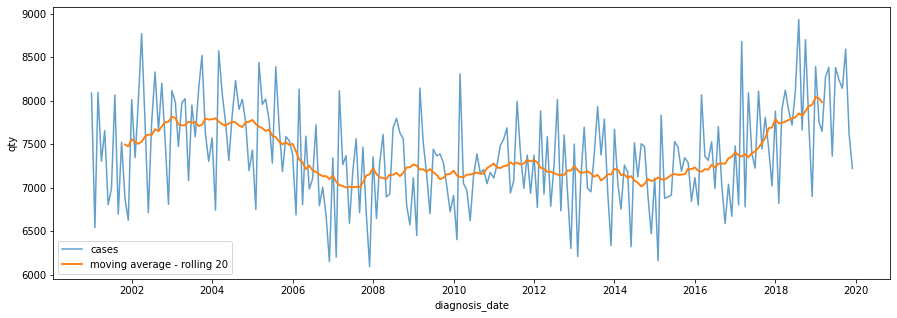

In [104]:
lineplot_tuberculosis_cases_moving_average(20)

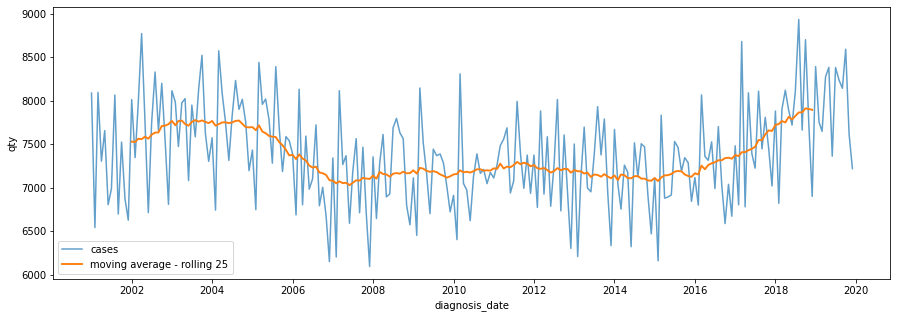

In [105]:
lineplot_tuberculosis_cases_moving_average(25)

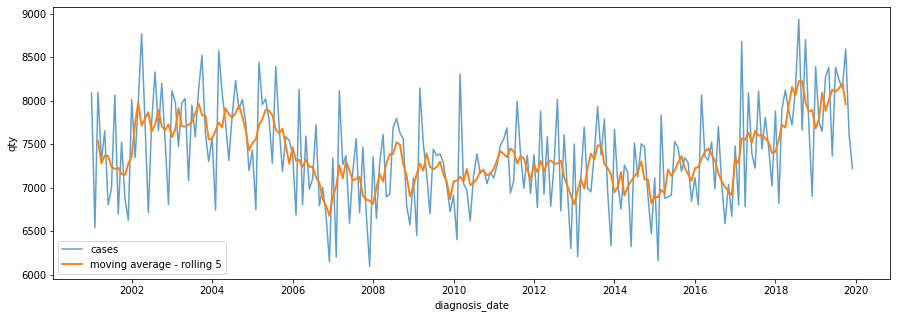

In [106]:
lineplot_tuberculosis_cases_moving_average(5)

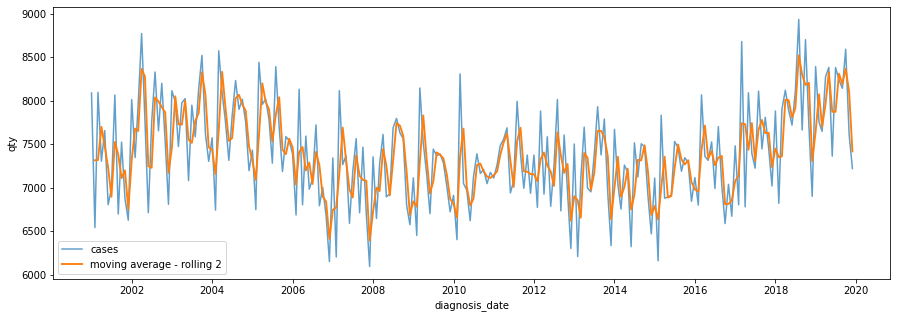

In [107]:
lineplot_tuberculosis_cases_moving_average(2)

### Challenge 03: Make your first prediction - use the averages (all data, or 3 last months).

code from: https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

In [123]:
# prepare situation
X = tuberculosis_ts['qty'].values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=7575.000000, expected=7305.000000
predicted=7314.000000, expected=7656.000000
predicted=7685.333333, expected=6805.000000
predicted=7255.333333, expected=6987.000000
predicted=7149.333333, expected=8065.000000
predicted=7285.666667, expected=6697.000000
predicted=7249.666667, expected=7524.000000
predicted=7428.666667, expected=6874.000000
predicted=7031.666667, expected=6627.000000
predicted=7008.333333, expected=8013.000000
predicted=7171.333333, expected=7346.000000
predicted=7328.666667, expected=7961.000000
predicted=7773.333333, expected=8771.000000
predicted=8026.000000, expected=7784.000000
predicted=8172.000000, expected=6713.000000
predicted=7756.000000, expected=7746.000000
predicted=7414.333333, expected=8330.000000
predicted=7596.333333, expected=7654.000000
predicted=7910.000000, expected=8200.000000
predicted=8061.333333, expected=7532.000000
predicted=7795.333333, expected=6809.000000
predicted=7513.666667, expected=8115.000000
predicted=7485.333333, expected=

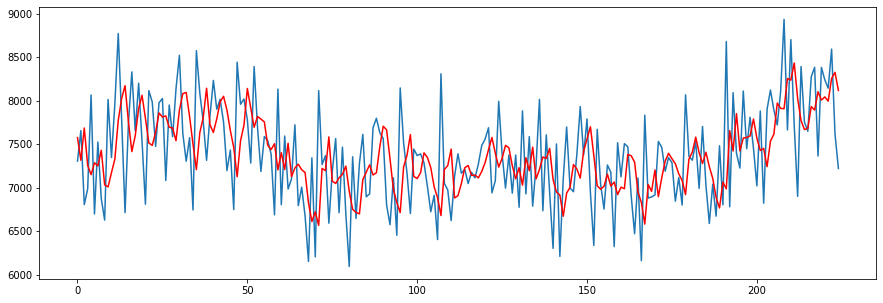

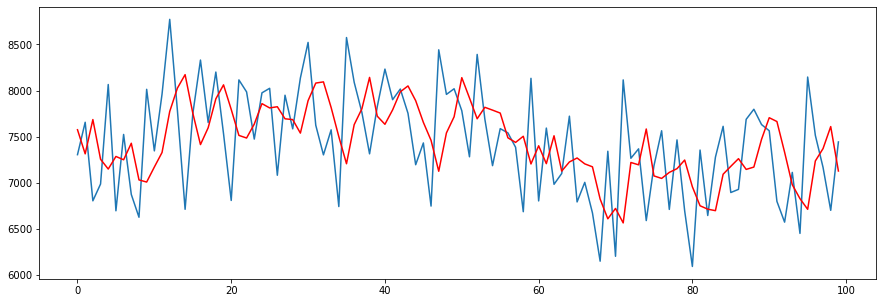

In [124]:
# plot
plt.figure(figsize=(15,5))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.figure(figsize=(15,5))

plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()